# Test EuroSciVac for DMOE 4.0

References:
- 1. [EU Vocabolaries](https://op.europa.eu/en/web/eu-vocabularies/navigation)

It is mostly a Thesauri, rather than an ontology. 

see in the above (1): 

## Thesaurus concept

Heavily hierarchical datasets (like some thesauries) include in their descriptions other properties like relations between concepts. Such relations are identified with the following strings that are used to prefix the respective links:

- MT – Identifies the parent of the described concept
- UF [Used form] – Equivalent or alternate label of the concept in the same language
- RT [Related concept] – Concepts having a meaning that can be considered as associated with the one -  described
- NT [Narrower concepts]  - Concepts that describe a subset or a specific area in of the base concept. Narrow relations can build links on multiple levels identified with NT1, NT2, NT3.
- BT [Broader concepts] – Concepts with a more generic meaning covering subject that are encompassing the the concept described. Broader relation can build links on multiple levels identified with BT1, BT2, BT3.



In [4]:
from ontology_manager.ontology_utils import OntologyManager
from rdflib import Graph, URIRef, Namespace, Literal, BNode, collection
from rdflib.namespace import SKOS, RDF, RDFS, OWL

In [5]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph, rdflib_to_graphtool
import networkx as nx
import matplotlib.pyplot as plt

In [6]:
from ontodot.ontodot import vis 
from ontodot.ontodot import OntoVis

In [7]:
def printH(s):
    the_line = "=" * (len(s)+1)
    print(f"{s}:\n{the_line}")


<br>
Test import of a sane ontology like MIO. <br>


In [8]:
mio=Namespace("http://www.ddmd.io/mio/")

In [9]:
base_path = '../MIO/'
catalog_file = 'catalog-v001.xml'

In [10]:
mio_manager = OntologyManager(base_path, catalog_file)
mio_manager.parse_catalog()
mio_manager.load_ontology()

name= http://ddmd.io/mio/ uri= ./mio/mio.ttl
Loaded ontology: http://ddmd.io/mio/


In [11]:
# there is one graph, we also know the name space,
g=mio_manager.ontology_graphs["http://ddmd.io/mio/"]

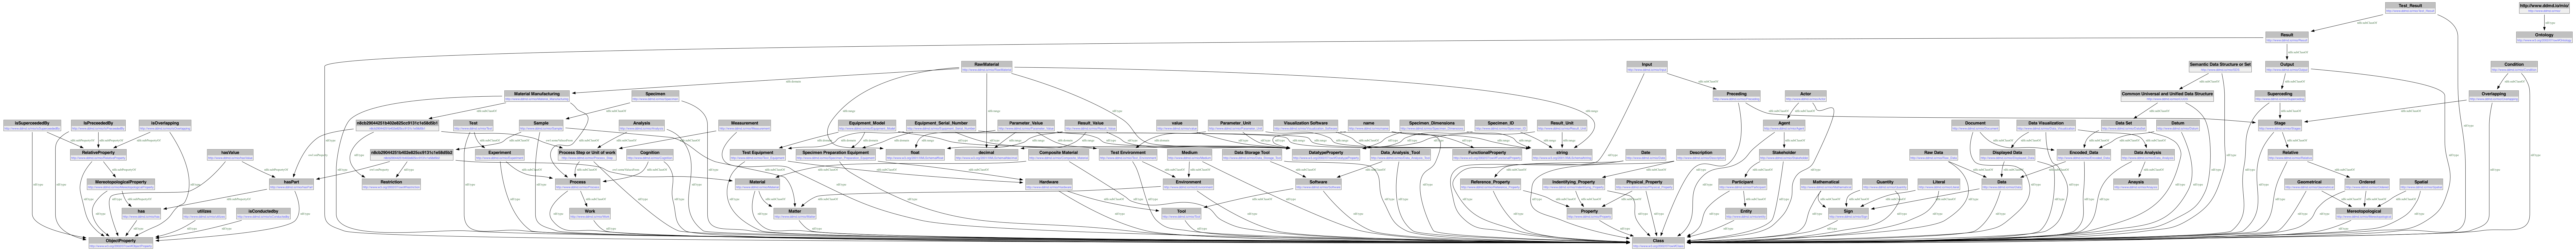

In [12]:
# plot, and check the OntoVis.Output folder for all images and dot files. 
vis(g, max_string_length=5)

In [13]:
# now load manually (as we did not add it in the catalog yet) the EurosciVac
evoc_g=Graph()
evoc_ns=Namespace('http://data.europa.eu/8mn/euroscivoc/')
evoc_path = "/Users/adham/dev/dome/Ontology-matters/external/EuroSciVoc-skos-ap-eu_1.3.ttl"
evoc_g.parse(evoc_path)
# we could add it to mio_manager manually actually, then use it as we want, 


<Graph identifier=N58266cf7ea944c7daa18e5d96488fcbe (<class 'rdflib.graph.Graph'>)>

In [14]:
for s,p,o in evoc_g:
    if p ==URIRef("http://www.w3.org/2004/02/skos/core#prefLabel"):
        if o.language == "en":
            print(o)


plant protection
civil engineering
polymer sciences
health economics
ethnomycology
paediatrics
meteors
endocrinology
radiology
super-Earths
L-functions
nuclear fission
fuel cells
remanufacturing
satellite technology
internet
data mining
water engineering
evolutionary ecology
metalloids
venereal diseases
artificial bone
water supply systems
ice giants
health care sciences
asthma
extragalactic astronomy
molecular spintronics
dementia
mass spectrometry
electric vehicles
social anthropology
data networks
medical laboratory technology
pharmacology and pharmacy
literature studies
z bosons
nephrology
postnatal care
criminology
environmental biotechnology
system software
obstetrics
lipids
fiber-optic network
electromagnetism
adverse drug reactions
asteroids
photochemistry
food allergy
molecular and chemical physics
WiFi
diagnostic imaging
agriculture
public administration
political transitions
magnetic resonance imaging
concentrated solar power
andrology
software development
supernova
geochron

# this is not an ontology, but a bunch of individuals! so lets ontologise it actually, and this should be investigated, why do they use it this way?

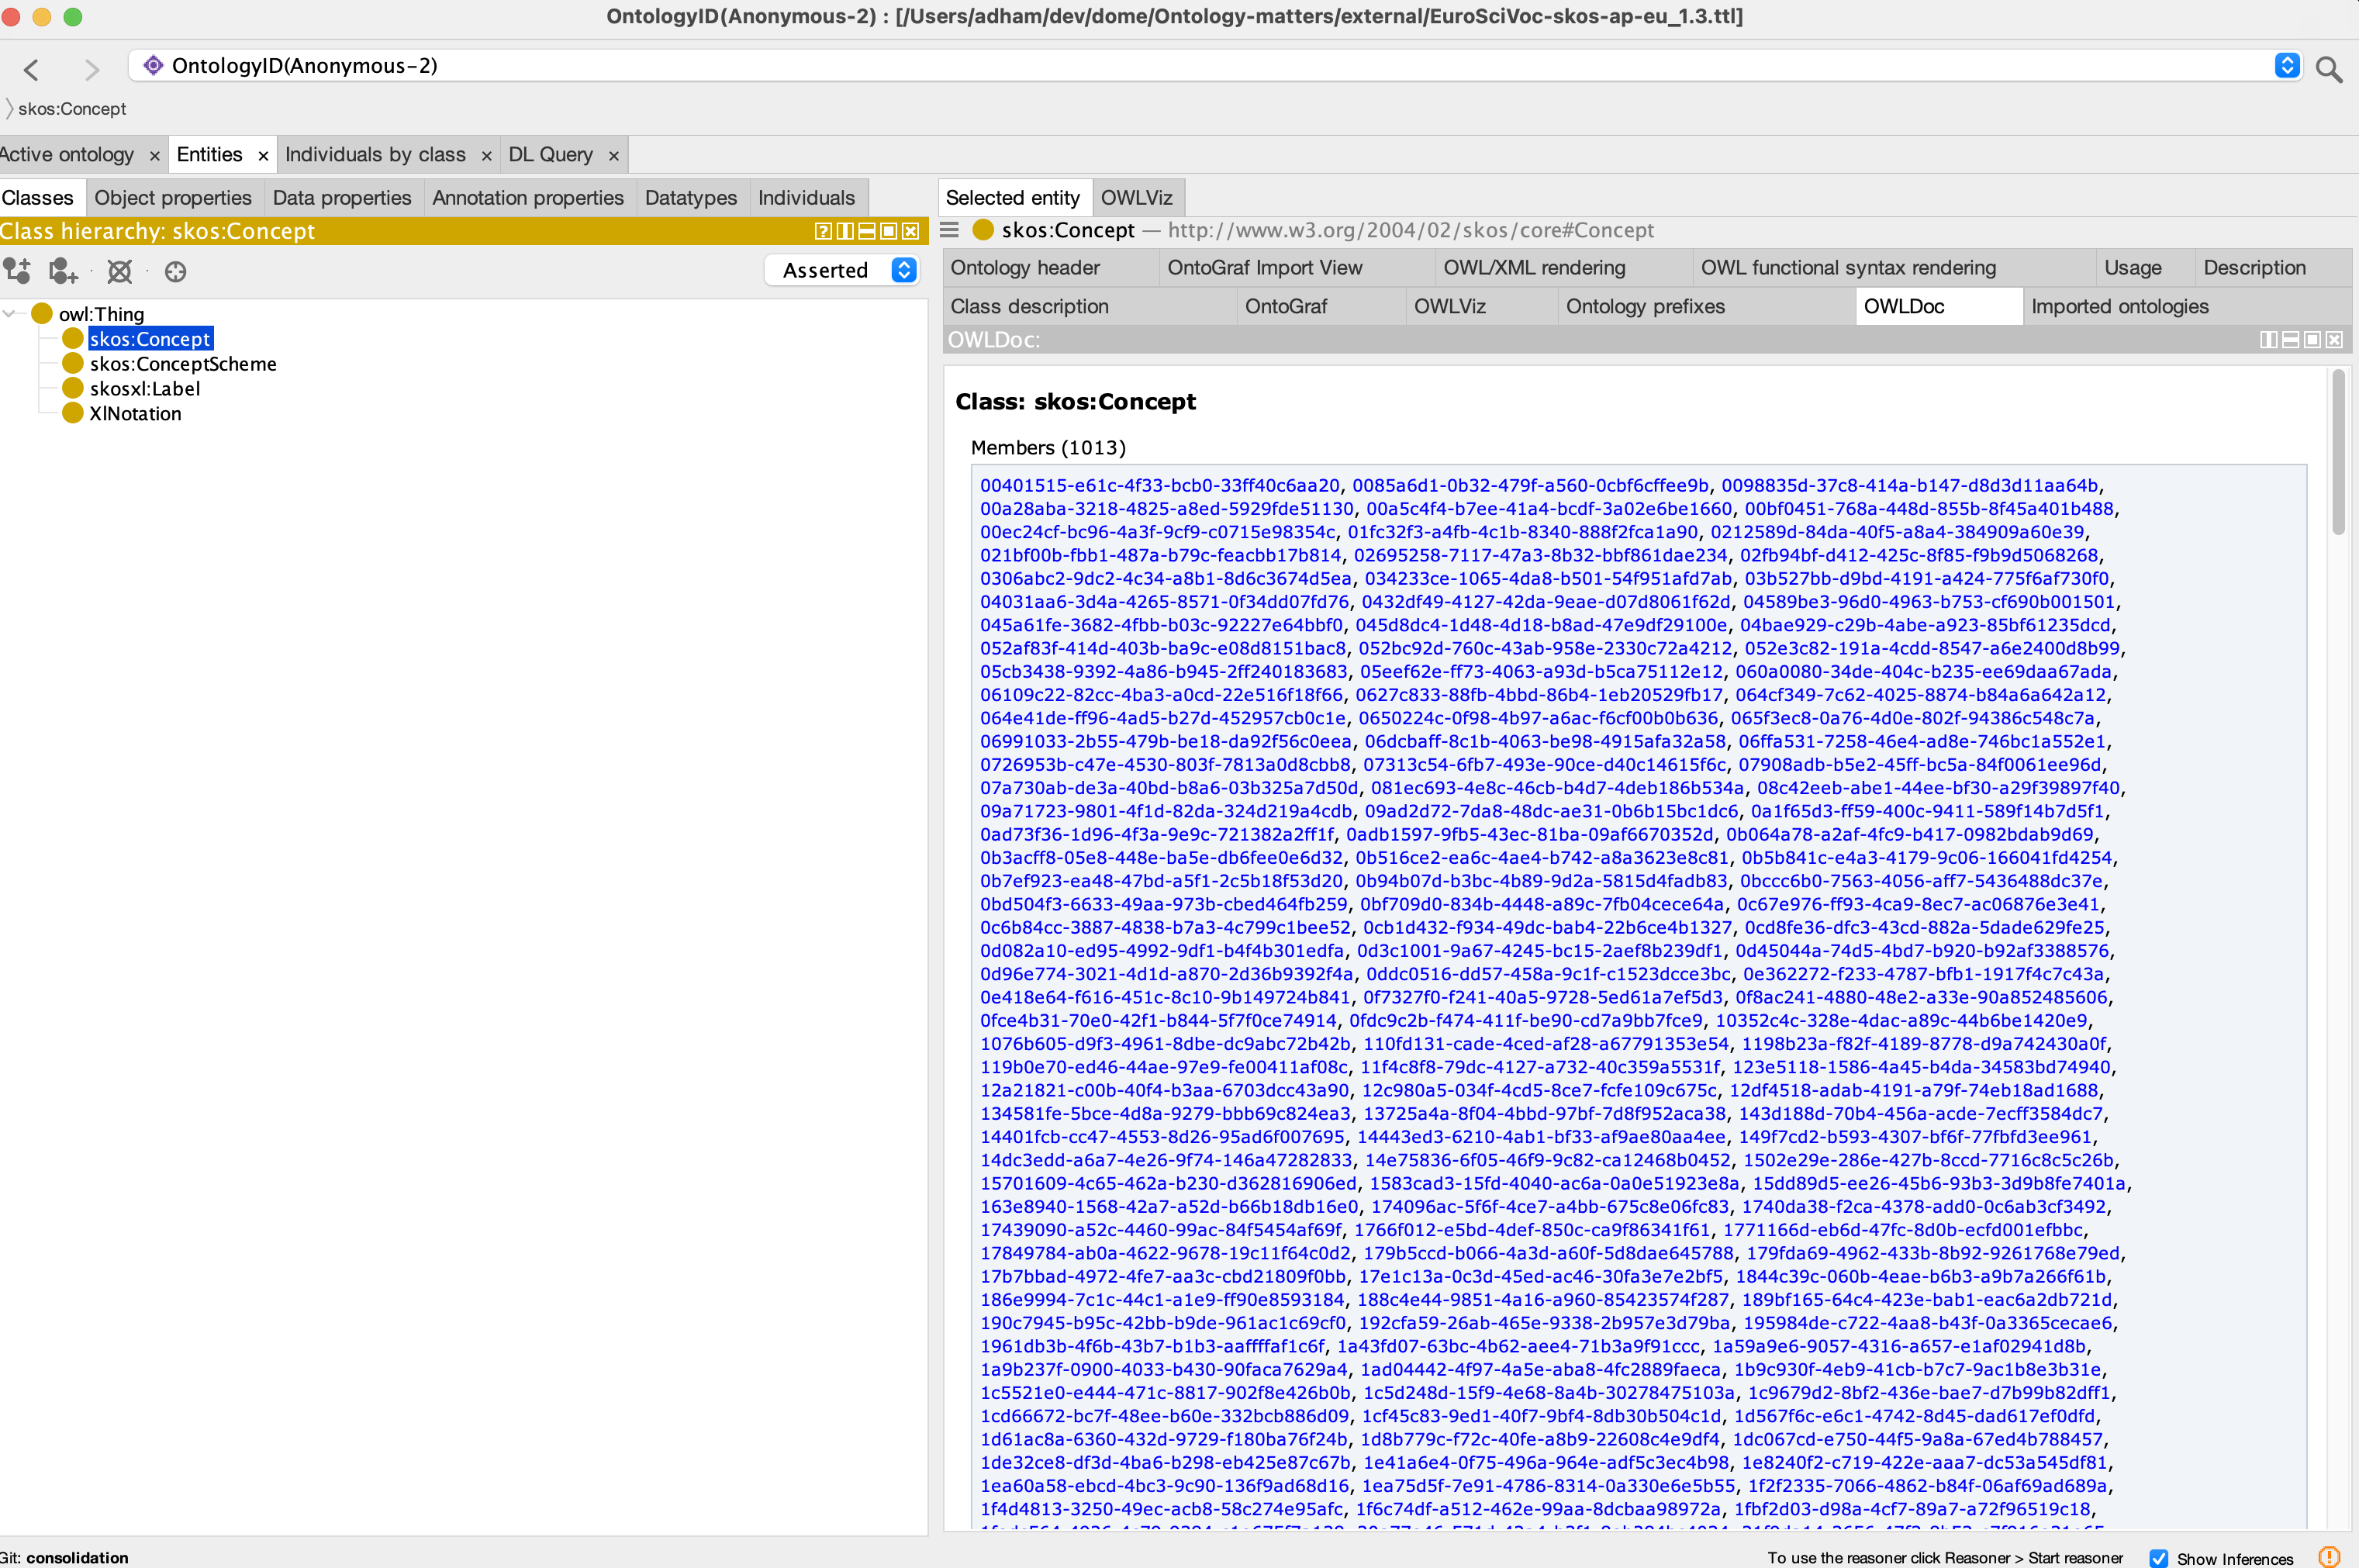

even protege suffers dealing with this so called ontology, so we will extract the labels and see what to do with them. 

In [15]:
print(SKOS)

http://www.w3.org/2004/02/skos/core#


In [29]:
q="""
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>

SELECT ?narrowerConcept ?narrowerLabel 
WHERE {
    ?narrowerConcept skos:broader+ <http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac> .
    ?narrowerConcept skos:prefLabel ?narrowerLabel .
        FILTER(LANGMATCHES(LANG(?narrowerLabel), "en"))

}
"""

Check [engineering and technology](https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac&lang=en) for 

It looks for all narrower in meanning concepts, and returns the label in english. note the + for the broader, it is the "path " argumdent of sparql... 

Check [engineering and technology](https://op.europa.eu/en/web/eu-vocabularies/concept/-/resource?uri=http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac&lang=en) for <http://data.europa.eu/8mn/euroscivoc/64605fff-1946-4fd4-b021-e2e83b71dcac>

In [30]:
r=evoc_g.query(q)

In [31]:
for i in r: 
    print(i)
    

(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/dc9a4100-9eb3-4956-8fd8-b67ea07a70ad'), rdflib.term.Literal('materials engineering', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/b235ad52-5fbd-4bad-b83f-60b1b43757f3'), rdflib.term.Literal('metallurgy', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/c570a89b-766b-4a16-9443-533d33d9b0ea'), rdflib.term.Literal('liquid crystals', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/c790f6e2-c1e0-44c1-a413-7f60e950f09d'), rdflib.term.Literal('fibers', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/c835a32d-04c8-493b-9644-203414287c92'), rdflib.term.Literal('composites', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/d8bd4a7a-de17-43a9-bfb1-1b94244d2b14'), rdflib.term.Literal('carbon fibers', lang='en'))
(rdflib.term.URIRef('http://data.europa.eu/8mn/euroscivoc/1ea60a58-ebcd-4bc3-9c90-136f9ad68d16'), rdflib.term.Literal('bi

In [33]:
for i in r: 
    print(f"g.add({i[0]}, {i[1]})")

g.add(http://data.europa.eu/8mn/euroscivoc/dc9a4100-9eb3-4956-8fd8-b67ea07a70ad, materials engineering)
g.add(http://data.europa.eu/8mn/euroscivoc/b235ad52-5fbd-4bad-b83f-60b1b43757f3, metallurgy)
g.add(http://data.europa.eu/8mn/euroscivoc/c570a89b-766b-4a16-9443-533d33d9b0ea, liquid crystals)
g.add(http://data.europa.eu/8mn/euroscivoc/c790f6e2-c1e0-44c1-a413-7f60e950f09d, fibers)
g.add(http://data.europa.eu/8mn/euroscivoc/c835a32d-04c8-493b-9644-203414287c92, composites)
g.add(http://data.europa.eu/8mn/euroscivoc/d8bd4a7a-de17-43a9-bfb1-1b94244d2b14, carbon fibers)
g.add(http://data.europa.eu/8mn/euroscivoc/1ea60a58-ebcd-4bc3-9c90-136f9ad68d16, biocomposites)
g.add(http://data.europa.eu/8mn/euroscivoc/ce6666e1-e816-4f32-8094-2634e44630d3, woodworking)
g.add(http://data.europa.eu/8mn/euroscivoc/0b5b841c-e4a3-4179-9c06-166041fd4254, synthetic dyes)
g.add(http://data.europa.eu/8mn/euroscivoc/2fba9c5c-193c-47ec-81f5-518020bff496, ceramics)
g.add(http://data.europa.eu/8mn/euroscivoc/4215b6

In [34]:
len(r)

208

In [35]:
x=Graph()

In [42]:
x.parse("https://op.europa.eu/o/opportal-service/euvoc-download-handler?cellarURI=http%3A%2F%2Fpublications.europa.eu%2Fresource%2Fcellar%2Fa9cbda63-2d9c-11ec-bd8e-01aa75ed71a1.0001.02%2FDOC_1&fileName=EuroSciVoc-skos-ap-eu.ttl")

PluginException: No plugin registered for (text/plain, <class 'rdflib.parser.Parser'>)

In [ ]:
r=x.query(q)

In [40]:
for i in r: 
    print(i)
    

In [41]:
len(r)

0